In [2]:
import pandas as pd

dataSet = pd.read_csv(r'..\data\CH05_Perceptron\testSet.txt',sep=',', engine='python',header=None,names=['x1','x2','y'])
dataSet['y'][dataSet.y==0]=-1
dataSet['x0'] = 1
dataSet

<ipython-input-2-1ba4463dfa15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['y'][dataSet.y==0]=-1


,x1,x2,y,x0
0,-0.017612,14.053064,-1,1
1,-1.395634,4.662541,1,1
2,-0.752157,6.538620,-1,1
3,-1.322371,7.152853,-1,1
4,0.423363,11.054677,-1,1
...,...,...,...,...
95,0.677983,2.556666,1,1
96,0.761349,10.693862,-1,1
97,-2.168791,0.143632,1,1
98,1.388610,9.341997,-1,1


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataSet.loc[:,['x0','x1','x2']],dataSet['y'],train_size=0.25)
X_train.head()

,x0,x1,x2
10,1,0.850433,6.920334
38,1,-1.527893,12.150579
66,1,2.530777,6.476801
9,1,-0.026632,10.427743
98,1,1.388610,9.341997


In [4]:
import numpy as np
w = np.mat([0.0,0.0,0.0])
n = 0.01
for idx in X_train.index:
    x = np.mat(X_train.loc[idx,:].to_numpy())
    y = y_train.loc[idx]
    yHat = w * x.T
    loss = y * yHat
    # print(loss)
    if loss <= 0:
        w += n*y*x
print(w)

[[ 0.02        0.04634504 -0.02985474]]


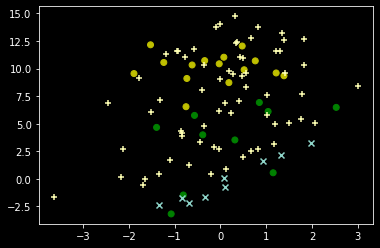

In [5]:
X_t = np.mat(X_test)
y_test_hat = w * X_t.T
y_test_hat = pd.DataFrame(y_test_hat.T)
y_test_hat
y_test_hat = y_test_hat[0].apply(lambda x:1 if x > 0 else -1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train.x1,X_train.x2,color = y_train.map({-1:'y',1:'g'}))

ax.scatter(X_test[(y_test_hat==1).values].x1,X_test[(y_test_hat==1).values].x2,marker= 'x')
ax.scatter(X_test[(y_test_hat==-1).values].x1,X_test[(y_test_hat==-1).values].x2,marker= '+')